## Import modules

In [3]:
from darkflow.net.build import TFNet
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np
from keras.models import load_model
import pafy
import datetime as dt
import time

## Config custom darkflow

In [31]:
config = tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth=True
with tf.Session(config=config) as sess:
    options = {
        'model':os.path.join('cfg','yolov2.cfg'),
        'load':os.path.join('bin','yolov2.weights'),
        'threshold':0.5,
        'gpu':1.0
    }
    tfnet = TFNet(options)

Parsing ./cfg/yolov2.cfg
Parsing cfg\yolov2.cfg
Loading bin\yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.014961957931518555s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 

## On image

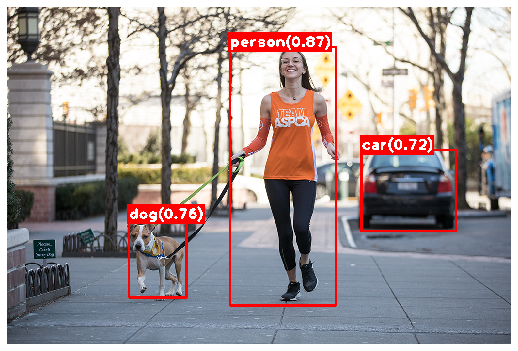

In [32]:
img = cv2.imread(os.path.join('test_images','test_image_general.jpg'))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
result = tfnet.return_predict(img)
for r in result:
    tl = (r['topleft']['x'], r['topleft']['y'])
    br = (r['bottomright']['x'], r['bottomright']['y'])
    label = r['label']
    conf = r['confidence'] # confidence of general dog detector
    text = '{}({:.2f})'.format(label,conf)
    (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_PLAIN,2,5)[0]
    text_offset_x = tl[0]-3
    text_offset_y = tl[1]
    box_coords = ((text_offset_x, text_offset_y+10), (text_offset_x+text_width,text_offset_y-text_height-10))

    img = cv2.rectangle(img, box_coords[0], box_coords[1], (255,0,0), cv2.FILLED)
    img = cv2.rectangle(img,tl,br,(255,0,0),thickness=4)
    img = cv2.putText(img,text,tl,cv2.FONT_HERSHEY_PLAIN,2,(255,255,255),3)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.subplots_adjust(left=0.2, wspace=0)